# All Imports

In [1]:
import numpy as np
import sep

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

# Open File + Read Data

In [3]:
with fits.open("105.fits") as hdul:
    data = hdul[0].data

# Show Starting Image

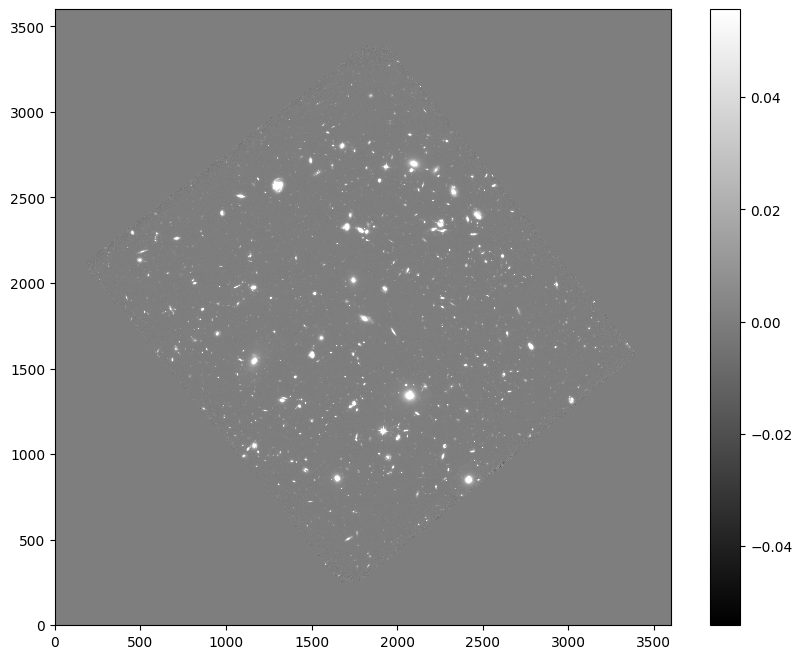

In [4]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("p2_fig_1", bbox_inches='tight', dpi=300)

# Swap bytes to fit expected 

In [5]:
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [6]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

# Take an average of each of the pixels in the image to figure out what is the backround

In [7]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


# Show and save just backround

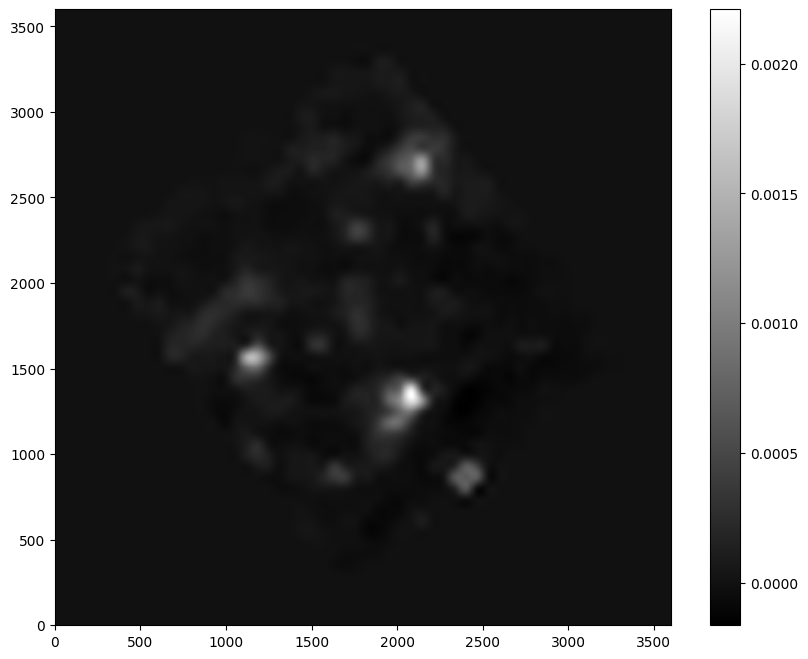

In [8]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("fig_2", bbox_inches='tight', dpi=300)

In [9]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

# Show a figure of the amount of noise in the backround

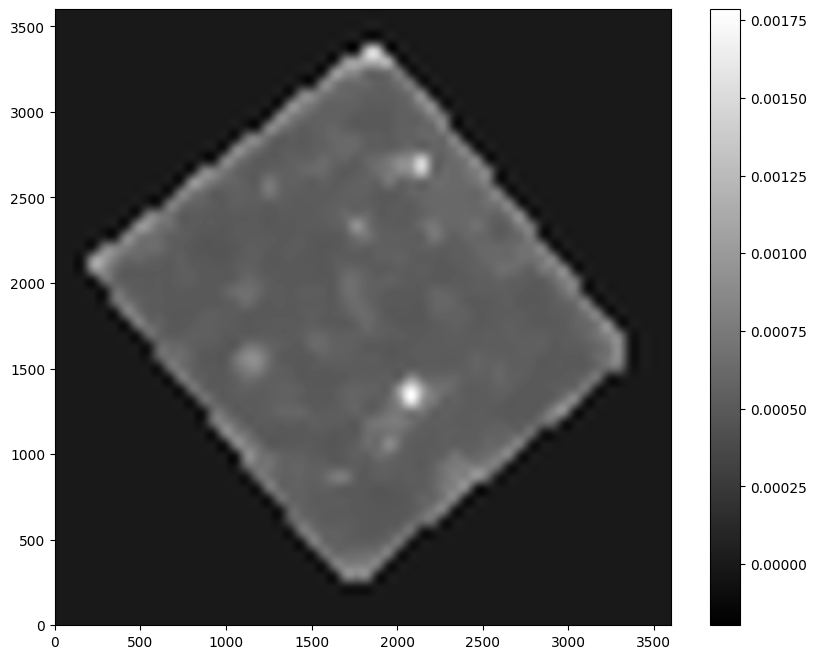

In [10]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("fig_3", bbox_inches='tight', dpi=300)

# Get leftover after deleting backround

In [11]:
# subtract the background
data_sub = data - bkg

In [12]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# Detect amount of Sources

In [13]:
#how many objects were detected
print(f'there are: {len(objects)}')

there are: 8643


# Take all plots and circle them

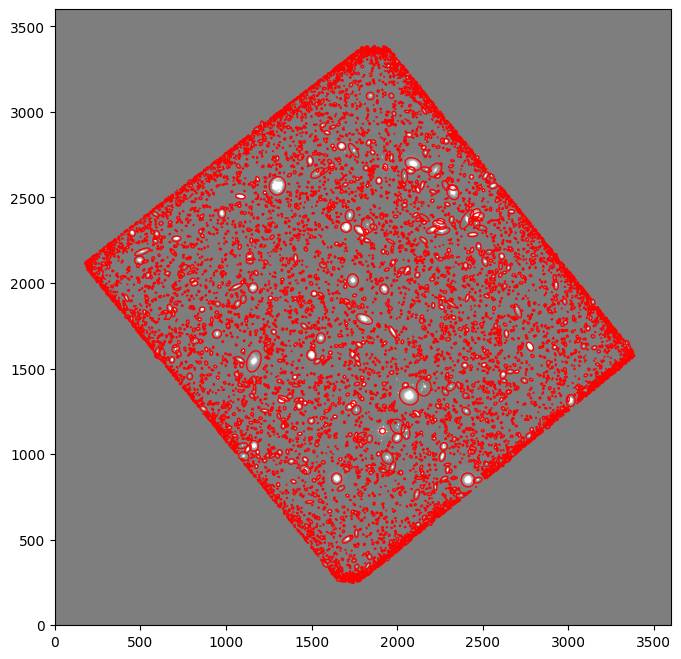

In [14]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("fig_4", bbox_inches='tight', dpi=300)

In [15]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

# create data holders

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

# First 10 objects

In [17]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


8643


Text(0.5, 1.0, 'flux histogram')

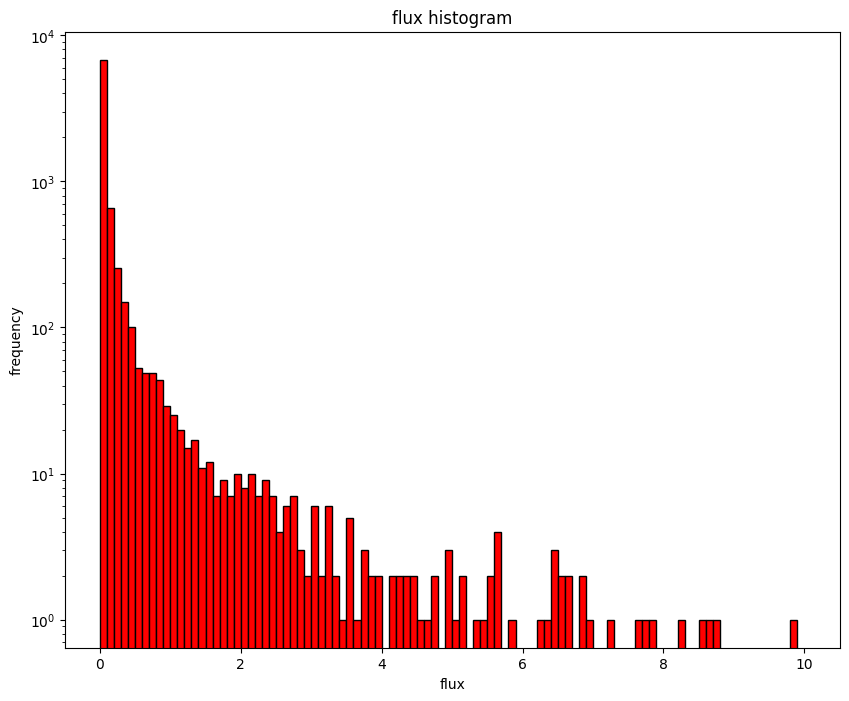

In [18]:
print(len(flux))
plt.hist(flux, bins=100, color='red', edgecolor='black',range = (0,10))
plt.yscale('log')
plt.xlabel('flux')
plt.ylabel('frequency')
plt.title('flux histogram')

In [22]:
print(f"Biggest outlier of fluxes: {np.max(flux):.2f}")
print(f"Mean of fluxes: {np.mean(flux):.2f}")
print(f"Median of fluxes: {np.median(flux):.2f}")
print(f"Standard deviation of fluxes: {np.std(flux):.2f}")

max_flux = np.max(flux)
mean_flux = np.mean(flux)
std_flux = np.std(flux)
num_std_devs = (max_flux - mean_flux) / std_flux

print(f"Max is {num_std_devs:.2f} standard deviations from the mean.")

Biggest outlier of fluxes: 807.30
Mean of fluxes: 0.36
Median of fluxes: 0.03
Standard deviation of fluxes: 9.24
Max is 87.31 standard deviations from the mean.


[W 2024-12-10 03:03:04,245.245 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


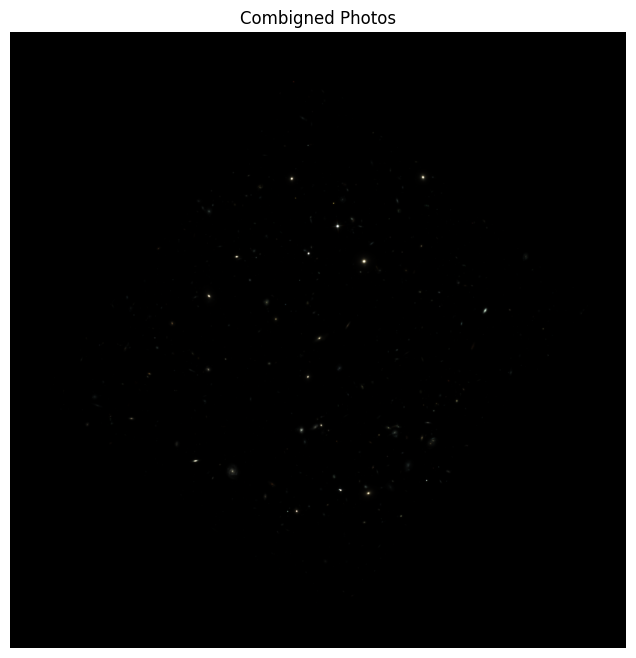

In [25]:

with fits.open("160.fits") as hdul:
    red = hdul[0].data

with fits.open("125.fits") as hdul:
    green = hdul[0].data

with fits.open("105.fits") as hdul:
    blue = hdul[0].data

rgb_image = np.stack((red, green, blue), axis=-1)

plt.imshow(rgb_image)
plt.axis('off')
plt.title("Combigned Photos")

plt.savefig("output_rgb_image.png", bbox_inches='tight', dpi=300)
plt.show()